In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
diabetes_dataframe = pd.read_csv('./Diabetes dataset/Clean_diabetes_dataset.csv')
diabetes_dataframe.head(5)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,5,5,116,74,0,0,25.6,0.201,30,0


In [89]:
# checking co-relationn 
corr_matrix = diabetes_dataframe.corr()
corr_matrix

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Unnamed: 0,1.000000,-0.036976,0.015439,0.028201,0.035387,0.033558,0.038722,-0.011275,0.019538,-0.028682
Pregnancies,-0.036976,1.000000,0.142093,0.210666,-0.094425,-0.114510,0.036958,0.009289,0.567438,0.227987
Glucose,0.015439,0.142093,1.000000,0.238754,-0.004609,0.248225,0.192504,0.066530,0.286682,0.492740
BloodPressure,0.028201,0.210666,0.238754,1.000000,0.037388,-0.041513,0.303301,0.024290,0.354036,0.183298
SkinThickness,0.035387,-0.094425,-0.004609,0.037388,1.000000,0.487566,0.390340,0.148486,-0.143376,0.030676
Insulin,0.033558,-0.114510,0.248225,-0.041513,0.487566,1.000000,0.188635,0.213191,-0.089535,0.097746
BMI,0.038722,0.036958,0.192504,0.303301,0.390340,0.188635,1.000000,0.144757,0.063370,0.269371
DiabetesPedigreeFunction,-0.011275,0.009289,0.066530,0.024290,0.148486,0.213191,0.144757,1.000000,0.030081,0.179072
Age,0.019538,0.567438,0.286682,0.354036,-0.143376,-0.089535,0.063370,0.030081,1.000000,0.263344
Outcome,-0.028682,0.227987,0.492740,0.183298,0.030676,0.097746,0.269371,0.179072,0.263344,1.000000


In [90]:
corr_matrix['Outcome']*100

Unnamed: 0                   -2.868235
Pregnancies                  22.798663
Glucose                      49.274005
BloodPressure                18.329784
SkinThickness                 3.067563
Insulin                       9.774559
BMI                          26.937130
DiabetesPedigreeFunction     17.907250
Age                          26.334387
Outcome                     100.000000
Name: Outcome, dtype: float64

In [91]:
diabetes_dataframe.drop(columns = ['Unnamed: 0','SkinThickness','Insulin','DiabetesPedigreeFunction'], inplace=True)

In [92]:
diabetes_dataframe.head(5)

,Pregnancies,Glucose,BloodPressure,BMI,Age,Outcome
0,6,148,72,33.6,50,1
1,1,85,66,26.6,31,0
2,8,183,64,23.3,32,1
3,1,89,66,28.1,21,0
4,5,116,74,25.6,30,0


In [93]:
X = diabetes_dataframe.drop(['Outcome'], axis='columns')
X.head(5)

,Pregnancies,Glucose,BloodPressure,BMI,Age
0,6,148,72,33.6,50
1,1,85,66,26.6,31
2,8,183,64,23.3,32
3,1,89,66,28.1,21
4,5,116,74,25.6,30


In [94]:
y = diabetes_dataframe.Outcome
y.head(5)

0    1
1    0
2    1
3    0
4    0
Name: Outcome, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)
len(X_train) # 511
len(X_test)  # 128

128

In [96]:
from sklearn.ensemble import RandomForestClassifier
Score = {}
n_estimators = [10,25,50,75,100,125,150]
criterion = ['gini', 'entropy', 'log_loss']
max_features = ['sqrt', 'log2']
for n in n_estimators:
    for c in criterion:
        for mf in max_features:
            model = RandomForestClassifier(n_estimators=n,criterion=c,max_features=mf)
            model.fit(X_train,y_train)
            acc = model.score(X_test,y_test)*100
            Score[n,c,mf] = acc
            
max(Score.values()) # 83.59375
tunedVal = max(Score,key=Score.get)
tunedVal,max(Score.values())

((25, 'log_loss', 'sqrt'), 83.59375)

In [97]:

model = RandomForestClassifier(n_estimators=25,criterion='gini',max_features='log2')
model.fit(X_train,y_train)
model.score(X_test,y_test)*100 # after cleaning -> 74.02597402597402 before cleaning ->79.6875 after tuning -> 83.59375

83.59375

In [101]:
y_pre = model.predict(X_test)

In [99]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test, y_pre)
cn

array([[82, 10],
       [11, 25]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth Values')

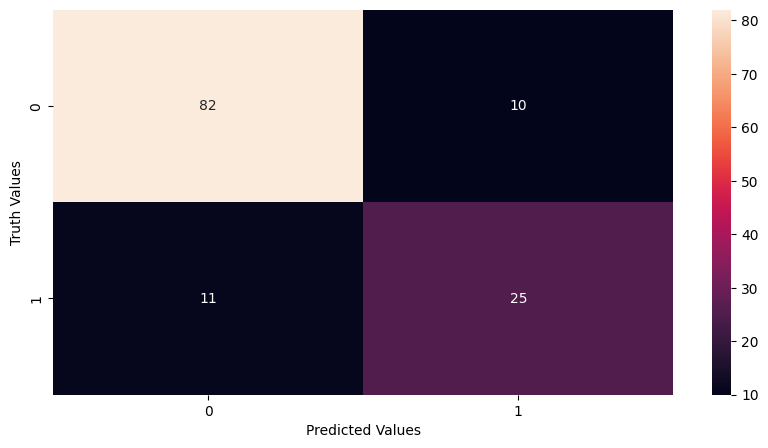

In [100]:
%matplotlib inline
plt.figure(figsize=(10,5))
sns.heatmap(cn, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Truth Values')